In [1]:
import sys
sys.path.insert(0,"/share/home/ychi/dev/hic_basic")
sys.path.insert(0,"/share/home/ychi/dev/hires_utils")
sys.path.insert(0,"/share/home/ychi/dev/sperm_struct")
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from lib.metrics import stack_contour
from lib.plot import plot_figure, plot_figure_canvas

ddir = Path("/shareb/ychi/repo/sperm_struct/notebooks/data/")

In [2]:
batches = [
    "mESC"
]

arg_bfs_lr_ft_files = { # full thickness
    batch : (ddir / batch).with_suffix(".lr_ft.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ft_files = {
    batch : (ddir / batch).with_suffix(".dv_ft.bfs.pkl")
    for batch in batches
}

### Show contour by occupancy.

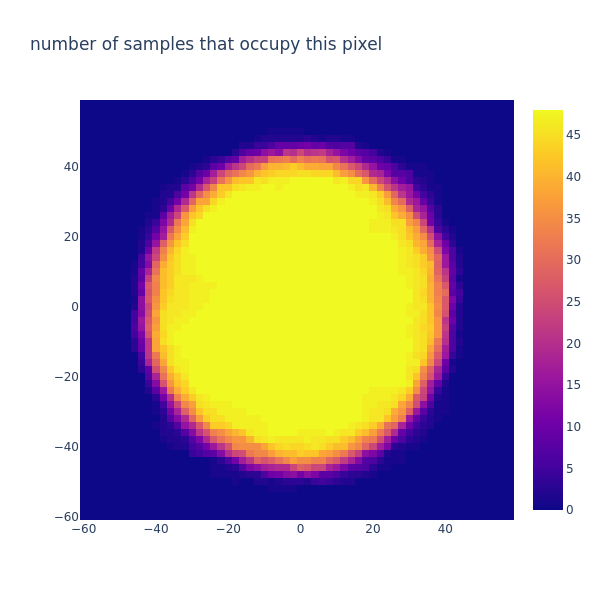

In [3]:
batch = "mESC"

bfs = pd.read_pickle(arg_bfs_lr_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].clip(upper=1).sum(axis=1)
fig = plot_figure_canvas(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0
    )
fig.update_layout(
    title = "number of samples that occupy this pixel",
    height = 600,
    width = 600
)
fig.show(renderer= "png")

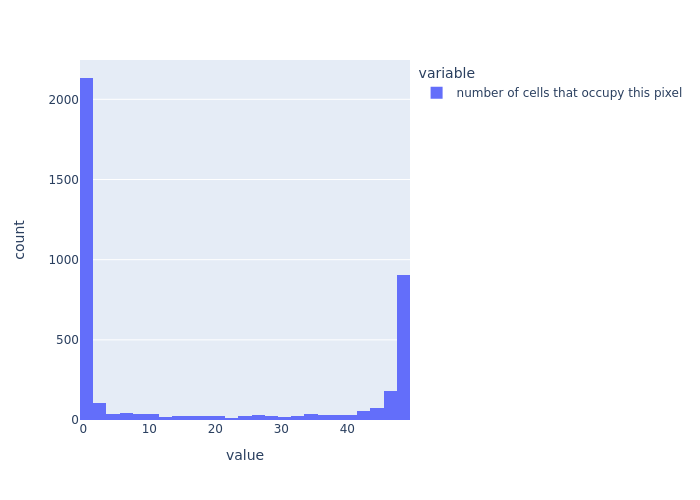

In [4]:
data = bfs["density"].clip(upper=1).sum(axis=1)
data.name = "number of cells that occupy this pixel"
fig = px.histogram(data)
fig.update_layout(
    height = 500,
    width = 700
)
fig.show(renderer= "png")

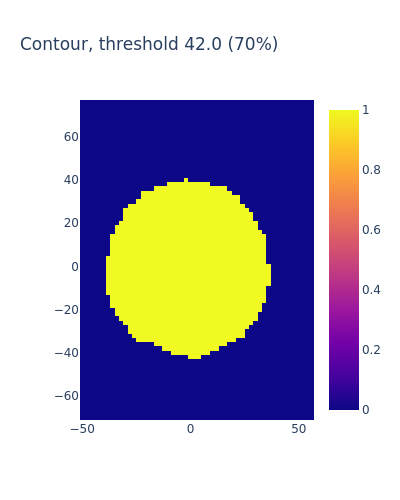

In [6]:
#threshold = 0.65
threshold = 0.7
cell_events = bfs["density"].clip(upper=1).sum(axis=1)
t_num = cell_events.quantile(threshold)
contour = pd.Series(0, bfs["density"].index)
contour[cell_events < t_num] = 0
contour[cell_events >= t_num] = 1
contour = contour.astype("bool")
#threshold = 50
#contour = bfs["density"].mean(axis=1).copy()
#contour[bfs["density"].mean(axis=1) < threshold] = 0
#contour[bfs["density"].mean(axis=1) >= threshold] = 1

data = contour.unstack().astype("int")
fig = plot_figure(
    data
)
fig.update_layout(
    title = "Contour, threshold %.1f (%d%%)" % (t_num, threshold*100)
)
fig.show(renderer= "png")

In [7]:
contour.to_pickle(f"{batch}.lr_contour.pkl")

ht-dv view

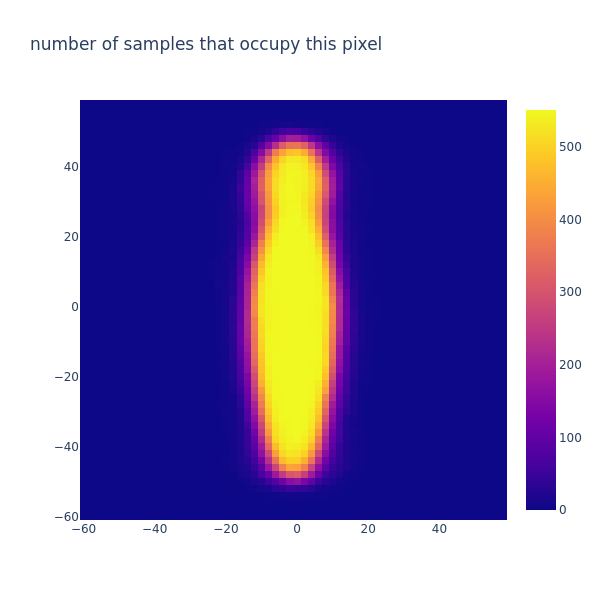

In [11]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_dv_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].clip(upper=1).sum(axis=1)
fig = plot_figure_canvas(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0,
    )
fig.update_layout(
    title = "number of samples that occupy this pixel",
    height = 600,
    width = 600
)
fig.show(renderer= "png")

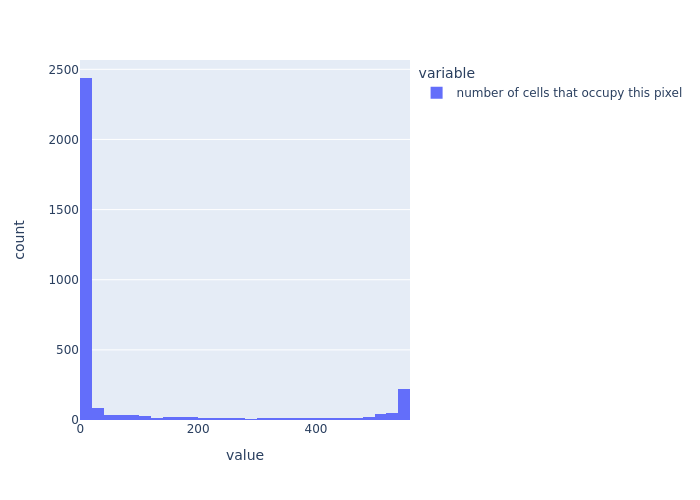

In [12]:
data = bfs["density"].clip(upper=1).sum(axis=1)
data.name = "number of cells that occupy this pixel"
fig = px.histogram(data)
fig.update_layout(
    height = 500,
    width = 700
)
fig.show(renderer= "png")

In [13]:
threshold = 0.85
cell_events = bfs["density"].clip(upper=1).sum(axis=1)
t_num = cell_events.quantile(threshold)
print(t_num)
contour = pd.Series(0, bfs["density"].index)
contour[cell_events < t_num] = 0
contour[cell_events >= t_num] = 1
contour = contour.astype("bool")

243.75


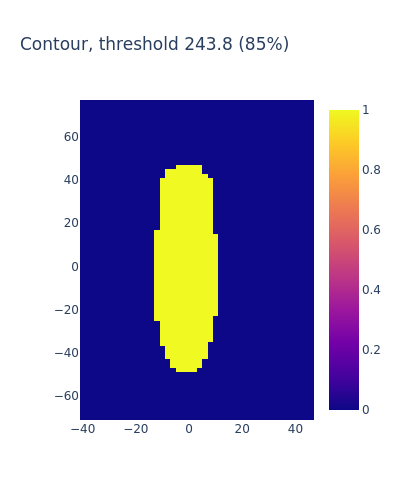

In [14]:
data = contour.unstack().astype("int")
fig = plot_figure(
    data
)
fig.update_layout(
    title = "Contour, threshold %.1f (%d%%)" % (t_num, threshold*100)
)
fig.show(renderer= "png")

In [16]:
contour.to_pickle(f"{batch}.dv_contour.pkl")

### direct contour method of lr

In [9]:
batch = "mESC"

bfs = pd.read_pickle(arg_bfs_lr_ft_files[batch])
silhoutte = bfs["density"].clip(upper=1).fillna(0)
silhoutte_contour = silhoutte.apply(stack_contour, axis=0)

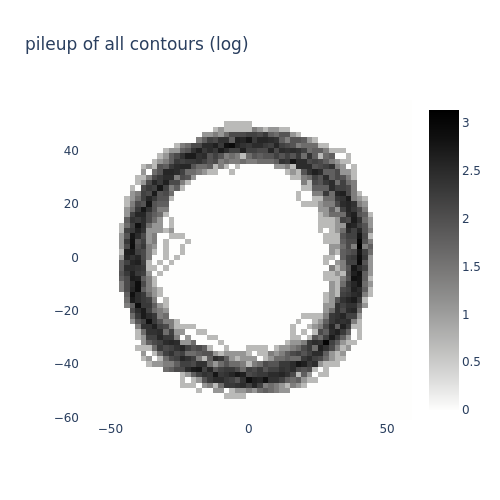

In [10]:
fig = plot_figure_canvas(
   np.log1p(silhoutte_contour.sum(axis=1).unstack()),
square_size=60,
   fill=0,
   cmap="gray_r"
)
fig.update_layout(
    title = "pileup of all contours (log)"
)
fig.show(renderer= "png")

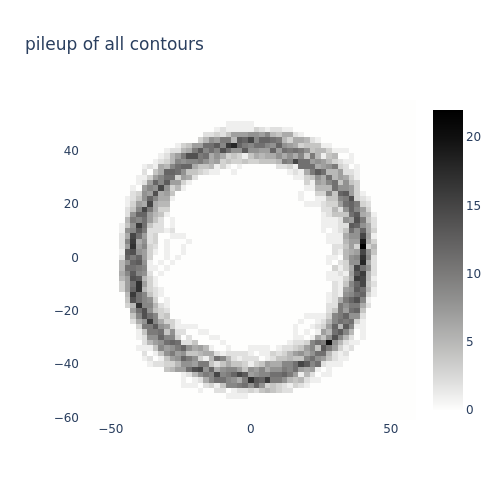

In [11]:
fig = plot_figure_canvas(
   silhoutte_contour.sum(axis=1).unstack(),
    square_size=60,
   fill=0,
   cmap="gray_r"
)
fig.update_layout(
    title = "pileup of all contours"
)
fig.show(renderer= "png")

### direct contour method of dv

In [14]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_dv_ft_files[batch])
silhoutte = bfs["density"].clip(upper=1).fillna(0)
silhoutte_contour = silhoutte.apply(stack_contour, axis=0)

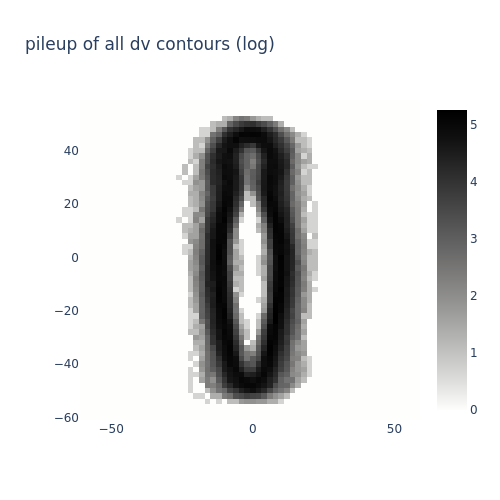

In [15]:
fig = plot_pileup(
   np.log1p(silhoutte_contour.sum(axis=1).unstack()),
square_size=60,
   fill=0,
   cmap="gray_r"
)
fig.update_layout(
    title = "pileup of all dv contours (log)"
)
fig.show(renderer= "png")

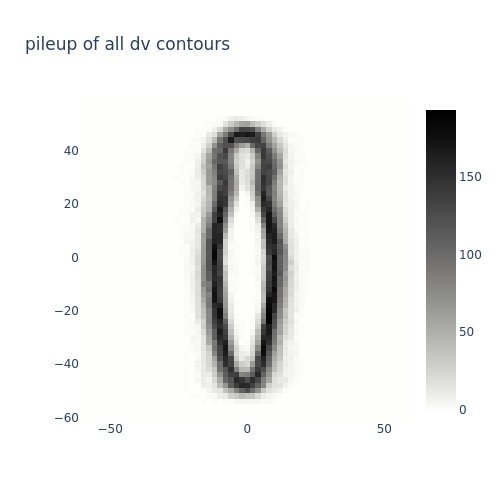

In [16]:
fig = plot_pileup(
   silhoutte_contour.sum(axis=1).unstack(),
square_size=60,
   fill=0,
   cmap="gray_r"
)
fig.update_layout(
    title = "pileup of all dv contours"
)
fig.show(renderer= "png")

### whole thickness density

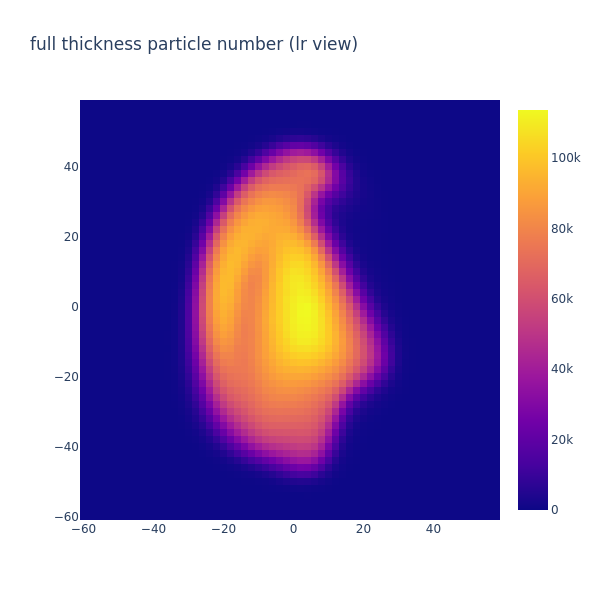

In [17]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_lr_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].sum(axis=1)
fig = plot_pileup(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0
    )
fig.update_layout(
    title = "full thickness particle number (lr view)",
    height = 600,
    width = 600
)
fig.show(renderer= "png")

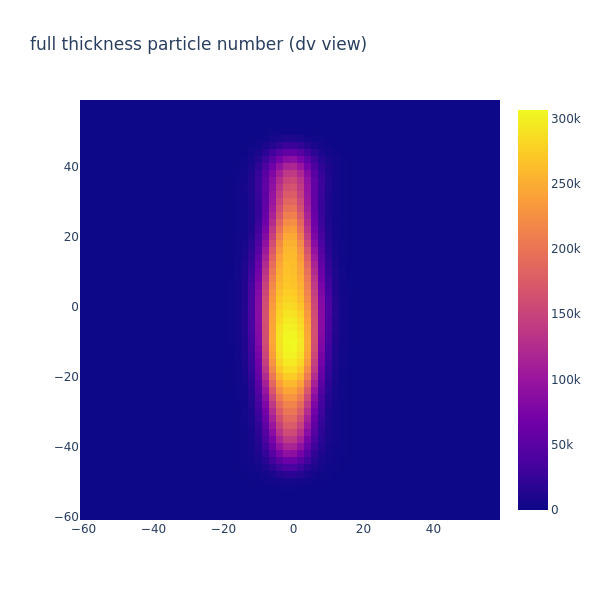

In [18]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_dv_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].sum(axis=1)
fig = plot_pileup(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0
    )
fig.update_layout(
    title = "full thickness particle number (dv view)",
    height = 600,
    width = 600
)
fig.show(renderer= "png")